# AlphaFold models for new DisProt set

We also want to investigate how the spearman correlation between pLDDT and true labels behaves for all sequences where we have true labels. This can then be compared with the pLDDT-IUPred correlation.

In [1]:
# Code to calculate in calc_disprot_plddt_spearman.py

import glob
import re

import pandas as pd
import numpy as np

In [2]:
dfs = []
for proteome_file in glob.glob('../data/alphafold/v2/AA_scores/*.csv'):
    proteome = re.search(r"/([A-Z0-9]+).csv", proteome_file).group(1)
    proteome_df = pd.read_csv(proteome_file, index_col=0)
    proteome_df['proteome'] = proteome
    dfs.append(proteome_df)
df = pd.concat(dfs)

In [3]:
df_spearman = df[df['disorder_plddt_spearman'].notnull()].copy()
df_spearman.describe()

,seq_len,domain_count,min_plddt,mean_plddt,median_plddt,ratio_bad_plddt,iupred_auc,iupred_plddt_spearman,repeat_6mers_2000,non_repeat_6mers_2000,aa_distr_js,freq_pos_charge,freq_neg_charge,freq_polar,freq_non_polar,IEP,iupred_auc_normalized,ptm,disorder_plddt_spearman,suboptim_compress
count,2473.000000,741.000000,2473.000000,2473.000000,2473.000000,2473.000000,2464.000000,631.000000,2402.000000,2402.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2.000000,2473.000000,28.000000
mean,535.876668,0.769231,32.983195,77.750406,82.470849,0.309104,53.554692,-0.413099,0.695254,1.322648,0.145562,0.141790,0.130635,0.482524,0.245053,6.713641,0.101604,0.646144,-0.324879,0.201721
std,424.752251,1.393779,9.695625,12.312616,17.329392,0.227286,131.460944,0.271109,2.812992,4.082191,0.052183,0.034439,0.038644,0.057817,0.049417,1.746065,0.181793,0.236622,0.298733,0.117398
min,36.000000,0.000000,8.620000,38.593400,30.075000,0.000000,0.006200,-0.924982,0.000000,0.000000,0.050400,0.021400,0.021300,0.306200,0.090900,4.050000,0.000000,0.478827,-0.865300,0.031500
25%,233.000000,0.000000,26.270000,69.480900,75.420000,0.122900,0.263150,-0.633775,0.000000,0.000000,0.106900,0.120875,0.106200,0.447300,0.214900,5.341600,0.000500,0.562486,-0.546900,0.113975
50%,424.000000,0.000000,30.610000,79.686300,89.770000,0.261800,0.414850,-0.460124,0.000000,0.000000,0.135877,0.138900,0.127450,0.483400,0.241400,6.142550,0.001200,0.646144,-0.330800,0.197400
75%,688.000000,1.000000,37.050000,87.645600,95.090000,0.458700,42.984125,-0.232938,0.000000,1.000000,0.174102,0.157825,0.149625,0.518700,0.271400,8.408800,0.175175,0.729802,-0.146400,0.315575
max,2555.000000,13.000000,86.430000,98.331900,98.820000,1.000000,1551.066500,0.486321,42.000000,115.000000,0.589700,0.363200,0.394600,0.739200,0.491700,12.000000,0.808000,0.813461,0.836100,0.410200


In [17]:
df_spearman['disorder_plddt_spearman'].mean()

-0.32487945814799907

In [19]:
df_spearman['iupred_plddt_spearman'].mean()

-0.41309856448933907

Figures copied from iupred vs plddt notebook and extended with true values and reduced in size. Later, extend with our results.

In [4]:
import matplotlib.pyplot as plt

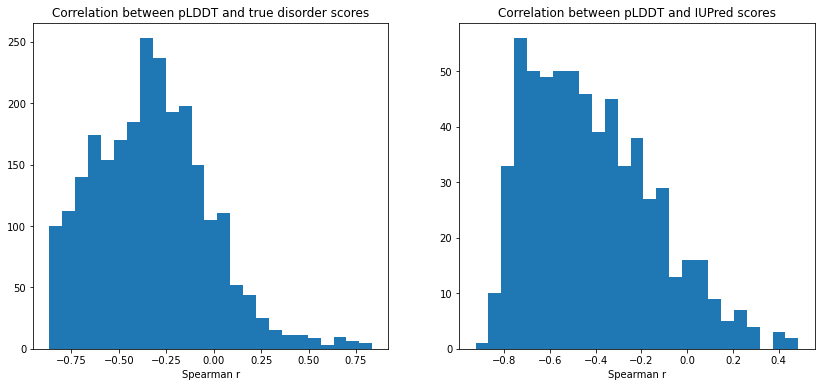

In [12]:
%matplotlib inline
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(14, 6))
ax1.hist(df_spearman['disorder_plddt_spearman'].values, bins=25)
ax1.set_title('Correlation between pLDDT and true disorder scores')
ax1.set_xlabel('Spearman r')

ax2.hist(df_spearman['iupred_plddt_spearman'].values, bins=25)
ax2.set_title('Correlation between pLDDT and IUPred scores')
ax2.set_xlabel('Spearman r')
plt.show()

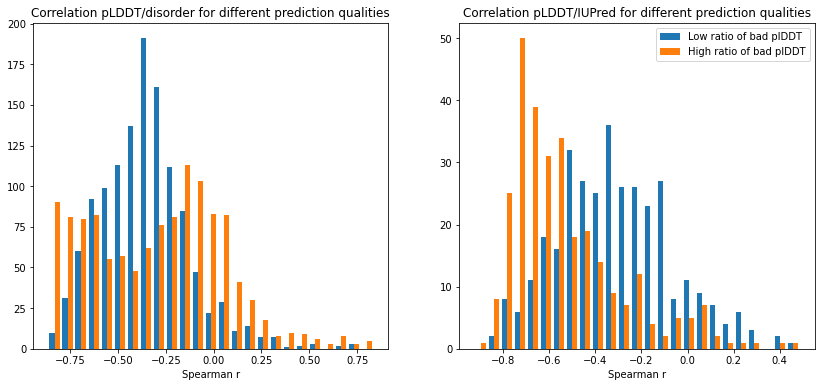

In [16]:
%matplotlib inline
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(14, 6))

median = df_spearman['ratio_bad_plddt'].median()
good_plddt_entries = df_spearman[df_spearman['ratio_bad_plddt'] <= median]
bad_plddt_entries = df_spearman[df_spearman['ratio_bad_plddt'] > median]

good_values_disorder = good_plddt_entries['disorder_plddt_spearman'].values
bad_values_disorder = bad_plddt_entries['disorder_plddt_spearman'].values

good_values_iupred = good_plddt_entries['iupred_plddt_spearman'].values
bad_values_iupred = bad_plddt_entries['iupred_plddt_spearman'].values

ax1.hist([good_values_disorder, bad_values_disorder], bins=25, label=['Low ratio of bad plDDT', 'High ratio of bad plDDT'])
ax1.set_title('Correlation pLDDT/disorder for different prediction qualities')
ax1.set_xlabel('Spearman r')

ax2.hist([good_values_iupred, bad_values_iupred], bins=25, label=['Low ratio of bad plDDT', 'High ratio of bad plDDT'])
ax2.set_title('Correlation pLDDT/IUPred for different prediction qualities')
ax2.set_xlabel('Spearman r')

plt.legend()
plt.show()